In [3]:
import pandas as pd

In [4]:
pd.Series(3.51,copy=10)

0    3.51
dtype: float64

In [5]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
# rest of the code

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import time
import csv
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
np.random.seed(1234)

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
content=pd.read_csv('household_power_consumption.txt',delimiter=';')

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [155]:
content.head()

,Global_active_power,Voltage,Global_intensity,DATE_TIME,T_1,T_2,T_3,T_4,T_5,IS_HOLIDAY
0,4.216,234.84,18.4,2006-12-16 17:24:00,0.000,0.000,0.000,0.000,0.0,0
1,5.360,233.63,23.0,2006-12-16 17:25:00,4.216,0.000,0.000,0.000,0.0,0
2,5.374,233.29,23.0,2006-12-16 17:26:00,5.360,4.216,0.000,0.000,0.0,0
3,5.388,233.74,23.0,2006-12-16 17:27:00,5.374,5.360,4.216,0.000,0.0,0
4,3.666,235.68,15.8,2006-12-16 17:28:00,5.388,5.374,5.360,4.216,0.0,0


In [9]:
len(content)

2075259

In [10]:
content.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [11]:
content.datatime = content.Date+' '+content.Time

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [12]:
content.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [13]:
content.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [14]:
content.isnull().any()

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3            True
dtype: bool

In [15]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [16]:
content["DATE_TIME"] = pd.to_datetime(content.Date + " " + content["Time"])

In [17]:
content.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DATE_TIME
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [18]:
content=content.drop(['Date','Time','Global_reactive_power'],axis=1)

In [19]:
content.head()

,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DATE_TIME
0,4.216,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [20]:
content=content.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)

In [21]:
content.head()

,Global_active_power,Voltage,Global_intensity,DATE_TIME
0,4.216,234.840,18.400,2006-12-16 17:24:00
1,5.360,233.630,23.000,2006-12-16 17:25:00
2,5.374,233.290,23.000,2006-12-16 17:26:00
3,5.388,233.740,23.000,2006-12-16 17:27:00
4,3.666,235.680,15.800,2006-12-16 17:28:00


In [22]:
content.dtypes

Global_active_power            object
Voltage                        object
Global_intensity               object
DATE_TIME              datetime64[ns]
dtype: object

In [23]:
content.isnull().values.any()

False

In [24]:
content=content.dropna(axis=0)

In [25]:
content.isnull().values.any()

False

In [26]:
content.isnull().sum()

Global_active_power    0
Voltage                0
Global_intensity       0
DATE_TIME              0
dtype: int64

In [27]:
len(content)

2075259

In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [29]:
content.Voltage = pd.to_numeric(content.Voltage,errors='coerce')

In [30]:
content.isnull().sum()

Global_active_power        0
Voltage                25979
Global_intensity           0
DATE_TIME                  0
dtype: int64

In [31]:
content=content.dropna(axis=0)

In [32]:
len(content)

2049280

In [33]:
content.Global_intensity = pd.to_numeric(content.Global_intensity,errors='coerce')

In [34]:
content.isnull().sum()

Global_active_power    0
Voltage                0
Global_intensity       0
DATE_TIME              0
dtype: int64

In [35]:
content=content.dropna(axis=0)

In [36]:
content.Global_active_power = pd.to_numeric(content.Global_active_power,errors='coerce')

In [37]:
content.isnull().sum()

Global_active_power    0
Voltage                0
Global_intensity       0
DATE_TIME              0
dtype: int64

In [38]:
content.dtypes

Global_active_power           float64
Voltage                       float64
Global_intensity              float64
DATE_TIME              datetime64[ns]
dtype: object

In [39]:
content.head()

,Global_active_power,Voltage,Global_intensity,DATE_TIME
0,4.216,234.84,18.4,2006-12-16 17:24:00
1,5.360,233.63,23.0,2006-12-16 17:25:00
2,5.374,233.29,23.0,2006-12-16 17:26:00
3,5.388,233.74,23.0,2006-12-16 17:27:00
4,3.666,235.68,15.8,2006-12-16 17:28:00


In [40]:
for obs in range(1,6):
    content["T_" + str(obs)] = content.Global_active_power.shift(obs)

In [41]:
content.head()

,Global_active_power,Voltage,Global_intensity,DATE_TIME,T_1,T_2,T_3,T_4,T_5
0,4.216,234.84,18.4,2006-12-16 17:24:00,NaN,NaN,NaN,NaN,NaN
1,5.360,233.63,23.0,2006-12-16 17:25:00,4.216,NaN,NaN,NaN,NaN
2,5.374,233.29,23.0,2006-12-16 17:26:00,5.360,4.216,NaN,NaN,NaN
3,5.388,233.74,23.0,2006-12-16 17:27:00,5.374,5.360,4.216,NaN,NaN
4,3.666,235.68,15.8,2006-12-16 17:28:00,5.388,5.374,5.360,4.216,NaN


In [42]:
content.fillna(0.00,inplace=True)
content.head(10)

,Global_active_power,Voltage,Global_intensity,DATE_TIME,T_1,T_2,T_3,T_4,T_5
0,4.216,234.84,18.4,2006-12-16 17:24:00,0.000,0.000,0.000,0.000,0.000
1,5.360,233.63,23.0,2006-12-16 17:25:00,4.216,0.000,0.000,0.000,0.000
2,5.374,233.29,23.0,2006-12-16 17:26:00,5.360,4.216,0.000,0.000,0.000
3,5.388,233.74,23.0,2006-12-16 17:27:00,5.374,5.360,4.216,0.000,0.000
4,3.666,235.68,15.8,2006-12-16 17:28:00,5.388,5.374,5.360,4.216,0.000
5,3.520,235.02,15.0,2006-12-16 17:29:00,3.666,5.388,5.374,5.360,4.216
6,3.702,235.09,15.8,2006-12-16 17:30:00,3.520,3.666,5.388,5.374,5.360
7,3.700,235.22,15.8,2006-12-16 17:31:00,3.702,3.520,3.666,5.388,5.374
8,3.668,233.99,15.8,2006-12-16 17:32:00,3.700,3.702,3.520,3.666,5.388
9,3.662,233.86,15.8,2006-12-16 17:33:00,3.668,3.700,3.702,3.520,3.666


In [43]:
# content["V_" + str(1)] = content.Voltage.shift(1)

In [44]:
# content["Global_intensity" + str(1)] = content.Global_intensity.shift(1)

In [45]:
content.head(10)

,Global_active_power,Voltage,Global_intensity,DATE_TIME,T_1,T_2,T_3,T_4,T_5
0,4.216,234.84,18.4,2006-12-16 17:24:00,0.000,0.000,0.000,0.000,0.000
1,5.360,233.63,23.0,2006-12-16 17:25:00,4.216,0.000,0.000,0.000,0.000
2,5.374,233.29,23.0,2006-12-16 17:26:00,5.360,4.216,0.000,0.000,0.000
3,5.388,233.74,23.0,2006-12-16 17:27:00,5.374,5.360,4.216,0.000,0.000
4,3.666,235.68,15.8,2006-12-16 17:28:00,5.388,5.374,5.360,4.216,0.000
5,3.520,235.02,15.0,2006-12-16 17:29:00,3.666,5.388,5.374,5.360,4.216
6,3.702,235.09,15.8,2006-12-16 17:30:00,3.520,3.666,5.388,5.374,5.360
7,3.700,235.22,15.8,2006-12-16 17:31:00,3.702,3.520,3.666,5.388,5.374
8,3.668,233.99,15.8,2006-12-16 17:32:00,3.700,3.702,3.520,3.666,5.388
9,3.662,233.86,15.8,2006-12-16 17:33:00,3.668,3.700,3.702,3.520,3.666


In [46]:
content.fillna(0.00,inplace=True)
content.head(10)

,Global_active_power,Voltage,Global_intensity,DATE_TIME,T_1,T_2,T_3,T_4,T_5
0,4.216,234.84,18.4,2006-12-16 17:24:00,0.000,0.000,0.000,0.000,0.000
1,5.360,233.63,23.0,2006-12-16 17:25:00,4.216,0.000,0.000,0.000,0.000
2,5.374,233.29,23.0,2006-12-16 17:26:00,5.360,4.216,0.000,0.000,0.000
3,5.388,233.74,23.0,2006-12-16 17:27:00,5.374,5.360,4.216,0.000,0.000
4,3.666,235.68,15.8,2006-12-16 17:28:00,5.388,5.374,5.360,4.216,0.000
5,3.520,235.02,15.0,2006-12-16 17:29:00,3.666,5.388,5.374,5.360,4.216
6,3.702,235.09,15.8,2006-12-16 17:30:00,3.520,3.666,5.388,5.374,5.360
7,3.700,235.22,15.8,2006-12-16 17:31:00,3.702,3.520,3.666,5.388,5.374
8,3.668,233.99,15.8,2006-12-16 17:32:00,3.700,3.702,3.520,3.666,5.388
9,3.662,233.86,15.8,2006-12-16 17:33:00,3.668,3.700,3.702,3.520,3.666


In [47]:
# content = content.drop(['Voltage','Global_intensity'], axis=1)

In [48]:
print(len(content))
print(content.dtypes)
print(content.describe())

2049280
Global_active_power           float64
Voltage                       float64
Global_intensity              float64
DATE_TIME              datetime64[ns]
T_1                           float64
T_2                           float64
T_3                           float64
T_4                           float64
T_5                           float64
dtype: object
       Global_active_power       Voltage  Global_intensity           T_1  \
count         2.049280e+06  2.049280e+06      2.049280e+06  2.049280e+06   
mean          1.091615e+00  2.408399e+02      4.627759e+00  1.091615e+00   
std           1.057294e+00  3.239987e+00      4.444396e+00  1.057294e+00   
min           7.600000e-02  2.232000e+02      2.000000e-01  0.000000e+00   
25%           3.080000e-01  2.389900e+02      1.400000e+00  3.080000e-01   
50%           6.020000e-01  2.410100e+02      2.600000e+00  6.020000e-01   
75%           1.528000e+00  2.428900e+02      6.400000e+00  1.528000e+00   
max           1.112200e+01  

In [49]:
content.columns

Index(['Global_active_power', 'Voltage', 'Global_intensity', 'DATE_TIME',
       'T_1', 'T_2', 'T_3', 'T_4', 'T_5'],
      dtype='object')

In [50]:
content.head()

,Global_active_power,Voltage,Global_intensity,DATE_TIME,T_1,T_2,T_3,T_4,T_5
0,4.216,234.84,18.4,2006-12-16 17:24:00,0.000,0.000,0.000,0.000,0.0
1,5.360,233.63,23.0,2006-12-16 17:25:00,4.216,0.000,0.000,0.000,0.0
2,5.374,233.29,23.0,2006-12-16 17:26:00,5.360,4.216,0.000,0.000,0.0
3,5.388,233.74,23.0,2006-12-16 17:27:00,5.374,5.360,4.216,0.000,0.0
4,3.666,235.68,15.8,2006-12-16 17:28:00,5.388,5.374,5.360,4.216,0.0


In [51]:
content.tail()

,Global_active_power,Voltage,Global_intensity,DATE_TIME,T_1,T_2,T_3,T_4,T_5
2075254,0.946,240.43,4.0,2010-11-26 20:58:00,0.946,0.942,0.946,0.946,0.944
2075255,0.944,240.00,4.0,2010-11-26 20:59:00,0.946,0.946,0.942,0.946,0.946
2075256,0.938,239.82,3.8,2010-11-26 21:00:00,0.944,0.946,0.946,0.942,0.946
2075257,0.934,239.70,3.8,2010-11-26 21:01:00,0.938,0.944,0.946,0.946,0.942
2075258,0.932,239.55,3.8,2010-11-26 21:02:00,0.934,0.938,0.944,0.946,0.946


In [52]:
cal = calendar()
holidays = cal.holidays(start = content.DATE_TIME.min(), end = content.DATE_TIME.max())
content["IS_HOLIDAY"] = content.DATE_TIME.isin(holidays)

In [53]:
content.head()

,Global_active_power,Voltage,Global_intensity,DATE_TIME,T_1,T_2,T_3,T_4,T_5,IS_HOLIDAY
0,4.216,234.84,18.4,2006-12-16 17:24:00,0.000,0.000,0.000,0.000,0.0,False
1,5.360,233.63,23.0,2006-12-16 17:25:00,4.216,0.000,0.000,0.000,0.0,False
2,5.374,233.29,23.0,2006-12-16 17:26:00,5.360,4.216,0.000,0.000,0.0,False
3,5.388,233.74,23.0,2006-12-16 17:27:00,5.374,5.360,4.216,0.000,0.0,False
4,3.666,235.68,15.8,2006-12-16 17:28:00,5.388,5.374,5.360,4.216,0.0,False


In [54]:
content.IS_HOLIDAY = content.IS_HOLIDAY.astype("int")

In [55]:
result=content

In [56]:
result.head()

,Global_active_power,Voltage,Global_intensity,DATE_TIME,T_1,T_2,T_3,T_4,T_5,IS_HOLIDAY
0,4.216,234.84,18.4,2006-12-16 17:24:00,0.000,0.000,0.000,0.000,0.0,0
1,5.360,233.63,23.0,2006-12-16 17:25:00,4.216,0.000,0.000,0.000,0.0,0
2,5.374,233.29,23.0,2006-12-16 17:26:00,5.360,4.216,0.000,0.000,0.0,0
3,5.388,233.74,23.0,2006-12-16 17:27:00,5.374,5.360,4.216,0.000,0.0,0
4,3.666,235.68,15.8,2006-12-16 17:28:00,5.388,5.374,5.360,4.216,0.0,0


In [57]:
result=result.drop(['DATE_TIME'],axis=1)

In [58]:
result.dtypes

Global_active_power    float64
Voltage                float64
Global_intensity       float64
T_1                    float64
T_2                    float64
T_3                    float64
T_4                    float64
T_5                    float64
IS_HOLIDAY               int32
dtype: object

In [59]:
len(result)

2049280

In [60]:
row = int(round(0.9 * result.shape[0]))


In [61]:
row

1844352

In [62]:
train = result.iloc[:row,:]


In [63]:
len(train)

1844352

In [64]:
import numpy as np


In [65]:
from sklearn.utils import shuffle
train = shuffle(train)

In [66]:
train.head()

,Global_active_power,Voltage,Global_intensity,T_1,T_2,T_3,T_4,T_5,IS_HOLIDAY
4794,0.210,246.68,0.8,0.228,0.268,0.298,0.280,0.298,0
1782331,1.348,236.36,5.6,1.340,1.306,1.256,1.256,1.264,0
407334,0.708,238.35,3.0,0.728,0.708,0.728,0.706,0.724,0
709060,0.354,243.07,1.6,0.350,0.372,0.698,1.004,0.984,0
957163,1.282,237.99,5.4,1.272,1.268,1.278,1.276,1.284,0


In [67]:
train.dtypes

Global_active_power    float64
Voltage                float64
Global_intensity       float64
T_1                    float64
T_2                    float64
T_3                    float64
T_4                    float64
T_5                    float64
IS_HOLIDAY               int32
dtype: object

In [68]:
train=train.sample(frac=0.75, random_state=2)

In [69]:
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = result.iloc[row:, 1:]
y_test = result.iloc[row:, 0]

In [70]:
X_train.head()

,Voltage,Global_intensity,T_1,T_2,T_3,T_4,T_5,IS_HOLIDAY
1216481,243.32,5.6,1.356,1.356,1.370,1.380,1.472,0
1661539,241.50,5.8,1.404,1.426,1.420,1.424,1.422,0
1469987,241.55,2.0,0.474,0.472,0.474,0.472,0.474,0
216547,235.39,1.6,0.368,0.368,0.356,0.280,0.210,0
32329,241.40,5.2,1.310,1.294,1.308,1.284,1.304,0


In [71]:
y_train.head()

1216481    1.362
1661539    1.402
1469987    0.468
216547     0.368
32329      1.290
Name: Global_active_power, dtype: float64

In [72]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1383264, 8), (1383264,), (204928, 8), (204928,))

In [73]:
scaler = StandardScaler()

In [74]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [75]:
X_train_scaled.shape

(1383264, 8)

In [76]:
rfr  = RandomForestRegressor(n_estimators = 50,max_depth=50, oob_score=True, random_state=2017,n_jobs=-1)

In [77]:
rfr.fit(X_train_scaled,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=True, random_state=2017, verbose=0, warm_start=False)

In [78]:
predicted1 = rfr.predict(X_test)

In [88]:
mean_squared_error(predicted1,y_test)

21.049809357204385

In [89]:
predicted1

array([5.6528 , 5.6528 , 5.25592, ..., 5.25592, 5.25592, 5.25592])

In [90]:
train = result.iloc[:row,:]


In [91]:

train = result.iloc[:row, :]
train = shuffle(train)
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = result.iloc[row:, 1:]
y_test = result.iloc[row:, 0]

In [92]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1844352, 8), (1844352,), (204928, 8), (204928,))

In [93]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [94]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [95]:
X_train_reshaped.shape, y_train.shape, X_test_reshaped.shape, y_test.shape

((1844352, 1, 8), (1844352,), (204928, 1, 8), (204928,))

In [96]:
# model_k = Sequential()
# model_k.add(LSTM(1, input_shape=(1,8)))
# model_k.add(Dense(1))
# model_k.compile(loss='mean_squared_error', optimizer='adam')

In [97]:
# model_k.fit(X_train_reshaped, y_train, validation_split=0.05,epochs=1, batch_size=256, verbose=2)

In [98]:
# model_k.fit(X_train_reshaped, y_train, validation_split=0.05,epochs=10, batch_size=256, verbose=2)

In [99]:
# X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [100]:
# res = model_k.predict(X_test_reshaped)

In [101]:
# mean_squared_error(res,y_test)

In [102]:
# res.shape

In [103]:
# y_test.shape

In [104]:
# res = np.reshape(res, (res.size,))
# print(res.shape)

In [105]:
# plt.plot(y_test[:100])

In [106]:
# plt.plot(res[:100])


In [107]:
# res

In [108]:
#     try:
#         fig = plt.figure()
#         ax = fig.add_subplot(111)
#         ax.plot(y_test.values[:100])
#         plt.plot(res[:100])
#         plt.show()
#     except Exception as e:
#         print (str(e))

In [109]:
# mean_squared_error(res,y_test)

In [110]:
model = Sequential()
layers = [1, 50, 100, 1]

model.add(LSTM(
        layers[1],
        input_shape=(None, 8),
        return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
        layers[2],
        return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
        layers[3]))
model.add(Activation("linear"))

start = time.time()
model.compile(loss="mse", optimizer="rmsprop")
print ("Compilation Time : ", time.time() - start)
    


Compilation Time :  0.050133705139160156


In [111]:
model.fit(X_train_reshaped, y_train,batch_size=512, nb_epoch=10, validation_split=0.05)

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1752134 samples, validate on 92218 samples
Epoch 1/10
1752134/1752134 [==============================] - 71s 40us/step - loss: 0.0293 - val_loss: 0.0025
Epoch 2/10
1752134/1752134 [==============================] - 71s 40us/step - loss: 0.0097 - val_loss: 0.0029
Epoch 3/10
1752134/1752134 [==============================] - 70s 40us/step - loss: 0.0088 - val_loss: 0.0031
Epoch 4/10
1752134/1752134 [==============================] - 70s 40us/step - loss: 0.0082 - val_loss: 0.0028
Epoch 5/10
1752134/1752134 [==============================] - 70s 40us/step - loss: 0.0079 - val_loss: 0.0032
Epoch 6/10
1752134/1752134 [==============================] - 71s 41us/step - loss: 0.0077 - val_loss: 0.0020
Epoch 7/10
1752134/1752134 [==============================] - 72s 41us/step - loss: 0.0075 - val_loss: 0.0016
Epoch 8/10
1752134/1752134 [==============================] - 70s 40us/step - loss: 0.0073 - val_loss: 0.0016
Epoch 9/10
1752134/1752134 [==============================] - 57s 32

In [137]:
history=model.fit(X_train_reshaped, y_train,batch_size=512, nb_epoch=10, validation_split=0.05)

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1752134 samples, validate on 92218 samples
Epoch 1/10
1752134/1752134 [==============================] - 71s 41us/step - loss: 0.0070 - val_loss: 0.0025
Epoch 2/10
1752134/1752134 [==============================] - 73s 41us/step - loss: 0.0070 - val_loss: 0.0058
Epoch 3/10
1752134/1752134 [==============================] - 72s 41us/step - loss: 0.0069 - val_loss: 0.0016
Epoch 4/10
1752134/1752134 [==============================] - 72s 41us/step - loss: 0.0068 - val_loss: 0.0016
Epoch 5/10
1752134/1752134 [==============================] - 76s 44us/step - loss: 0.0067 - val_loss: 0.0023
Epoch 6/10
1752134/1752134 [==============================] - 71s 40us/step - loss: 0.0066 - val_loss: 0.0021
Epoch 7/10
1752134/1752134 [==============================] - 72s 41us/step - loss: 0.0066 - val_loss: 0.0028
Epoch 8/10
1752134/1752134 [==============================] - 73s 42us/step - loss: 0.0065 - val_loss: 0.0044
Epoch 9/10
1752134/1752134 [==============================] - 71s 41

In [138]:
history

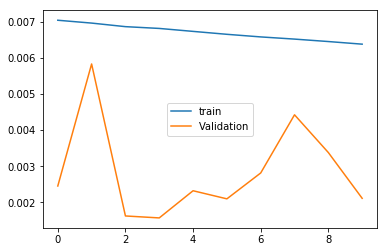

In [140]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='Validation')
pyplot.legend()
pyplot.show()

In [112]:
res2 = model.predict(X_test_reshaped)

In [136]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 50)          11800     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 72,301
Trainable params: 72,301
Non-trainable params: 0
_________________________________________________________________


In [113]:
X_test_reshaped[0,:]

array([[-0.46462228,  0.06874348,  0.0930337 ,  0.0953532 ,  0.11391216,
         0.10927185,  0.04663354, -0.00382616]])

In [114]:

res2 = np.reshape(res2, (res2.size,))
print(res2.shape)

(204928,)


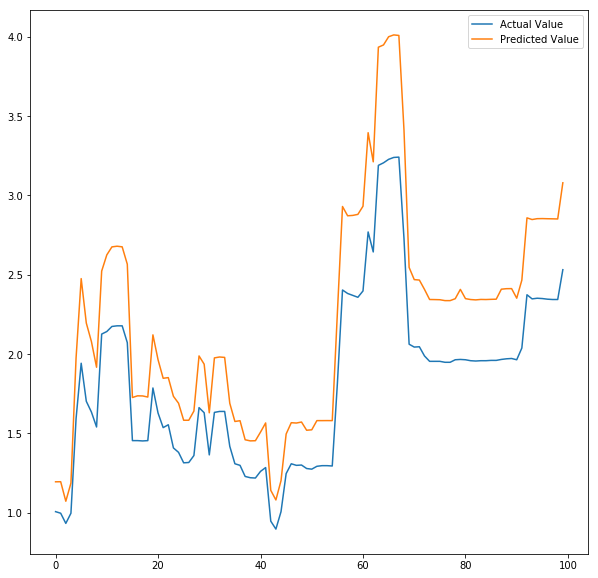

In [154]:
    try:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
        ax.plot(y_test.values[:100],label='Actual Value')
        plt.plot(res2[:100],label='Predicted Value')
        plt.legend()
        plt.show()
    except Exception as e:
        print (str(e))

In [116]:
mean_squared_error(res2,y_test)

0.07959310370688759

In [117]:
X_test_reshaped.shape, y_test.shape

((204928, 1, 8), (204928,))

In [118]:
res2.shape

(204928,)

In [119]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                    # Use this to store the prediction made on each test window
    moving_test_window = [X_test_reshaped[0,:].tolist()]          # Creating the first test window
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
        
    return preds_moving

In [120]:
preds_movin = moving_test_window_preds(50)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [121]:
X_test_reshaped[0,:]

array([[-0.46462228,  0.06874348,  0.0930337 ,  0.0953532 ,  0.11391216,
         0.10927185,  0.04663354, -0.00382616]])

In [122]:
moving_test_window=np.array([X_test_reshaped[0,:].tolist()])

In [123]:
moving_test_window.shape

(1, 1, 8)

In [124]:
preds_moving = []

In [125]:
preds_one_step = model.predict(moving_test_window) 



In [126]:
preds_one_step.shape

(1, 1)

In [127]:
preds_moving.append(preds_one_step[0,0]) 


In [128]:
preds_moving.shape

AttributeError: 'list' object has no attribute 'shape'

In [129]:
preds_one_step = preds_one_step.reshape(1,1,1) 

In [130]:
preds_one_step.shape

(1, 1, 1)

In [131]:
preds_one_step

array([[[1.1942595]]], dtype=float32)

In [132]:
moving_test_window

array([[[-0.46462228,  0.06874348,  0.0930337 ,  0.0953532 ,
          0.11391216,  0.10927185,  0.04663354, -0.00382616]]])

In [133]:
moving_test_window[:,:,:]

array([[[-0.46462228,  0.06874348,  0.0930337 ,  0.0953532 ,
          0.11391216,  0.10927185,  0.04663354, -0.00382616]]])

In [134]:
new = np.concatenate((moving_test_window[:,:,:], preds_one_step), axis=1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [135]:
moving_test_window.concat(preds_one_step)

AttributeError: 'numpy.ndarray' object has no attribute 'concat'